# LINEAR REGRESSION
We will create a linear regression class from scratch. We will implement the algorithm using only minimal libraries such as NumPy.

In [1]:
import numpy as np

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    """

    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.coef_ = None
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _add_bias(self, X):
        if self.no_bias:
            return X
        # Add bias term (column of 1s)
        bias = np.ones((X.shape[0], 1))
        return np.hstack([bias, X])

    def _mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, X, y, X_val=None, y_val=None):
        X = self._add_bias(X)
        if X_val is not None:
            X_val = self._add_bias(X_val)

        # Initialize weights
        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            y_pred = X @ self.coef_
            error = y_pred - y
            gradient = 2 * X.T @ error / X.shape[0]
            self.coef_ -= self.lr * gradient

            # Calculate and store training loss
            self.loss[i] = self._mse(y, y_pred)

            # Calculate and store validation loss if available
            if X_val is not None and y_val is not None:
                val_pred = X_val @ self.coef_
                self.val_loss[i] = self._mse(y_val, val_pred)

            # Verbose output
            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}, Training Loss: {self.loss[i]:.4f}", end='')
                if X_val is not None:
                    print(f", Validation Loss: {self.val_loss[i]:.4f}")
                else:
                    print()

    def predict(self, X):
        X = self._add_bias(X)
        return X @ self.coef_

# Problem 1: Assumption function
Implement the linear regression assumption function given by the following formula.

[h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n (x_0 = 1)\]

In [2]:
# Function definition: self is member function and x as an argument
def _linear_hypothesis(self, X):
    """
    Compute the linear hypothesis function

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        Training data

    Returns
    -------
    ndarray of shape (n_samples,)
        Predictions using the linear hypothesis function
    """
    return np.dot(X, self.coef_)

# Problem 2: Gradient descent method
Please implement training using the gradient descent method. Add the _gradient_descent method for updating the parameters expressed by the following formula, and call it from the fit method.

[\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]]

In [3]:
def _gradient_descent(self, X, error):
    """
    Perform one step of gradient descent and update model parameters.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        Training data with bias term added (if applicable)

    error : ndarray of shape (n_samples,)
        Difference between predicted and actual target values (h(x) - y)
    """
    m = X.shape[0]  # Number of training samples

    # Compute the gradient of the loss function with respect to the parameters
    gradient = (2 / m) * np.dot(X.T, error)

    # Update the parameters by stepping in the direction of the negative gradient
    self.coef_ -= self.lr * gradient

# Problem 3: Estimation
Finding output values using parameters is called estimation or prediction. We will implement the estimation mechanism then add it to the predict method included in the ScratchLinearRegression class.

The output of the assumption function  hθ(x)  is the estimation result.

In [4]:
def predict(self, X):
    """
    Predict using the linear regression model.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        Input data

    Returns
    -------
    predictions : ndarray of shape (n_samples,)
        Prediction results using the learned parameters
    """
    # Add bias term if needed
    X = self._add_bias(X)

    # Compute and return predictions using the linear hypothesis function
    return self._linear_hypothesis(X)

# Problem 4: Mean square error
The mean squared error is calculated by calculating the square of the difference between the correct value and the predicted value for each data in the training data and then taking the average of these . It can be expressed as the formula below.

Since the mean squared error function is a function that can be used in general regression problems, we will create it as a separate function rather than as a method of the ScratchLinearRegression class. 

The mean squared error is expressed by the following formula:

[L(\theta)= \frac{1 }{ m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.]

In [5]:
def MSE(y_pred, y):
    """
    Calculate the Mean Squared Error (MSE)

    Parameters
    ----------
    y_pred : ndarray of shape (n_samples,)
        Predicted values

    y : ndarray of shape (n_samples,)
        True values

    Returns
    -------
    mse : float
        Mean Squared Error (divided by 2, to be used as a loss function in gradient descent)
    """
    # Compute the mean of the squared differences, and divide by 2 for use in gradient descent
    mse = np.mean((y_pred - y) ** 2) / 2
    return mse


# Problem 5: Objective function
The objective function is equal to the ground truth label and the mean squared error divided by 2. There is a term called loss function with almost the same meaning. The function that determines how to evaluate the residual is called the loss function, and it is ultimately the objective function that we want to minimize (maximize).We will implement the objective function (loss function) for linear regression expressed by the following formula and record it in self.loss.self.val_loss

The objective function (loss function)  J(θ)  is given by:

[J(\theta)= \frac{1 }{ 2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.]

In [6]:
def fit(self, X, y, X_val=None, y_val=None):
    """
    Train the linear regression model using gradient descent.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        Training features

    y : ndarray of shape (n_samples,)
        Training targets

    X_val : ndarray of shape (n_val_samples, n_features), optional
        Validation features

    y_val : ndarray of shape (n_val_samples,), optional
        Validation targets
    """
    # Add bias term if required
    X = self._add_bias(X)
    if X_val is not None:
        X_val = self._add_bias(X_val)

    # Initialize coefficients (weights) with zeros
    self.coef_ = np.zeros(X.shape[1])

    for i in range(self.iter):
        # Compute predictions and error
        y_pred = self._linear_hypothesis(X)
        error = y_pred - y

        # Update weights using gradient descent
        self._gradient_descent(X, error)

        # Calculate and store training loss
        self.loss[i] = MSE(y_pred, y)

        # Calculate and store validation loss (if available)
        if X_val is not None and y_val is not None:
            val_pred = self._linear_hypothesis(X_val)
            self.val_loss[i] = MSE(val_pred, y_val)

         # Print progress if verbose
        if self.verbose and i % 100 == 0:
            print(f"Iteration {i}, Training Loss: {self.loss[i]:.4f}", end='')
            if X_val is not None:
                print(f", Validation Loss: {self.val_loss[i]:.4f}")
            else:
                print()

# VERIFICATION
# Problem 6: Learning and estimation
We will train and estimate your Scratch implementation on the data from the House Prices competition that we prepared in the Introduction to Machine Learning Scratch Sprint.

Then check that it works correctly by comparing it with the implementation by scikit-learn.

In [7]:
# Load and prepare dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data (adjust path as needed)
data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# Drop rows with missing target
data = data.dropna(subset=["SalePrice"])

# Select numeric features only
X = data.select_dtypes(include=np.number).drop(columns=["SalePrice"]).fillna(0)
y = data["SalePrice"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train Scratch model
# Instantiate and train your scratch linear regression
scratch_model = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=True)
scratch_model.fit(X_train_scaled, y_train, X_test_scaled, y_test)

# Predict with scratch model
y_pred_scratch = scratch_model.predict(X_test_scaled)

# Calculate MSE
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
print(f"Scratch Model MSE: {mse_scratch:.2f}")

Iteration 0, Training Loss: 38885583525.7098, Validation Loss: 37343923995.8598
Iteration 100, Training Loss: 1773352274.0146, Validation Loss: 2086158949.9375
Iteration 200, Training Loss: 1166271308.5442, Validation Loss: 1346403999.2897
Iteration 300, Training Loss: 1145076937.8264, Validation Loss: 1309158695.3006
Iteration 400, Training Loss: 1140757260.7969, Validation Loss: 1304891680.1614
Iteration 500, Training Loss: 1138960733.0652, Validation Loss: 1304362069.8889
Iteration 600, Training Loss: 1138070253.3485, Validation Loss: 1304312107.1608
Iteration 700, Training Loss: 1137577486.2329, Validation Loss: 1304260848.0642
Iteration 800, Training Loss: 1137283624.4126, Validation Loss: 1304164532.9203
Iteration 900, Training Loss: 1137099978.0324, Validation Loss: 1304044802.6845
Scratch Model MSE: 1303924344.33


In [9]:
# Train and test scikit-learn model
# Train scikit-learn model
sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)

# Predict
y_pred_sk = sk_model.predict(X_test_scaled)

# Calculate MSE
mse_sk = mean_squared_error(y_test, y_pred_sk)
print(f"Scikit-learn Model MSE: {mse_sk:.2f}")

Scikit-learn Model MSE: 1303391219.64


In [10]:
# Compare results
print(f"\nMSE Comparison:\nScratch MSE: {mse_scratch:.2f}\nSklearn MSE: {mse_sk:.2f}")


MSE Comparison:
Scratch MSE: 1303924344.33
Sklearn MSE: 1303391219.64


# Problem 7: Plotting the learning curve
We will create a function that displays the learning curve, run it, and check the graph to see if the loss is dropping appropriately.

The linear regression class template records the loss in self.loss and self.val_loss, so please use these as input.

In [11]:
import matplotlib.pyplot as plt

def plot_learning_curve(model):
    """
    Plots the training and validation loss over iterations.

    Parameters
    ----------
    model : ScratchLinearRegression instance
        Trained model that contains loss and val_loss arrays.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(model.loss, label='Training Loss',linewidth=10)
    
    # Check if validation loss exists (not all problems use it)
    if model.val_loss is not None and np.any(model.val_loss != 0):
        plt.plot(model.val_loss, label='Validation Loss',linewidth=6)

    plt.xlabel("Iterations")
    plt.ylabel("Loss (MSE / 2)")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

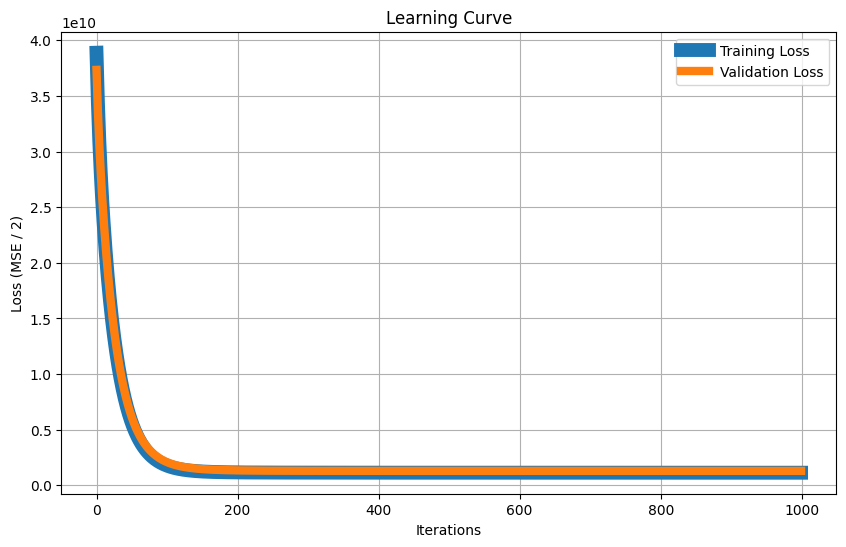

In [12]:
plot_learning_curve(scratch_model)

A steady decrease in training loss shows that the model is learning well.

# Problem 8: (Advanced) Removing bias terms
Examine how removing the bias term theta changes learning, and explore the role of the bias term in linear regression models. We will modify the ScratchLinearRegression class to factor in bias and without bias

In [13]:
# With bias
model_with_bias = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False)
model_with_bias.fit(X_train_scaled, y_train, X_test_scaled, y_test)

# Without bias
model_no_bias = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=False)
model_no_bias.fit(X_train_scaled, y_train, X_test_scaled, y_test)

In [14]:
from sklearn.metrics import mean_squared_error

y_pred_with_bias = model_with_bias.predict(X_test_scaled)
y_pred_no_bias = model_no_bias.predict(X_test_scaled)

print("MSE with Bias:", mean_squared_error(y_test, y_pred_with_bias))
print("MSE without Bias:", mean_squared_error(y_test, y_pred_no_bias))

MSE with Bias: 1303924344.331578
MSE without Bias: 35671301510.74226


 The bias term lets our model shift the prediction surface up and down and validation imrpoves. Without it, the model is too restricted and may lead to poor performance since the regression line does not shift to fit the true data pattern

With Bias Term:


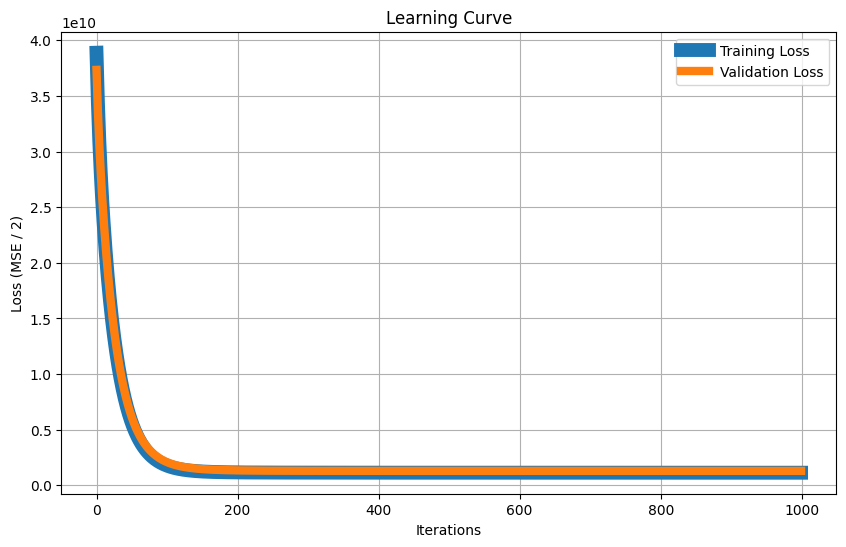

Without Bias Term:


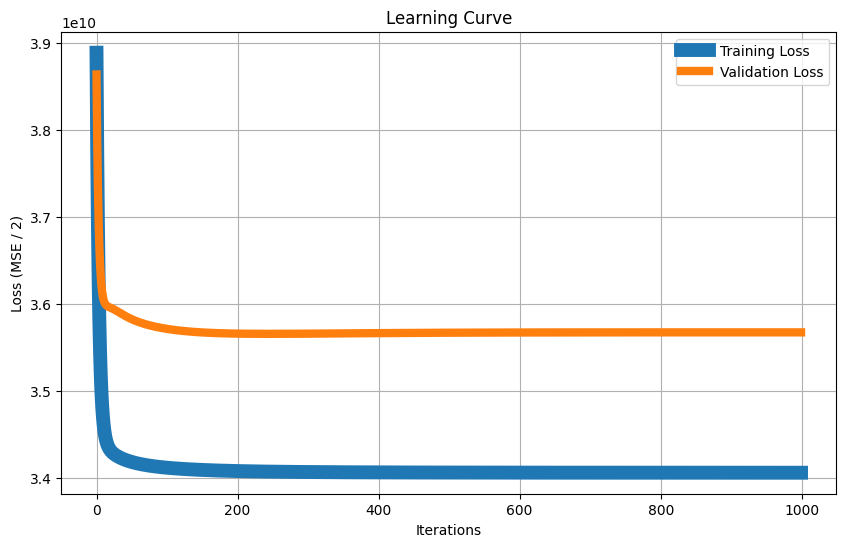

In [15]:
print("With Bias Term:")
plot_learning_curve(model_with_bias)

print("Without Bias Term:")
plot_learning_curve(model_no_bias)

# Problem 9: (Advanced) Multidimensional feature
Verify how the learning results change when you use squared or cubed features as input.

In [16]:
# Create new features
# Squared features
X_train_squared = X_train_scaled ** 2
X_test_squared = X_test_scaled ** 2

# Cubed features
X_train_cubed = X_train_scaled ** 3
X_test_cubed = X_test_scaled ** 3

In [17]:
# Train with different features
# Original model (baseline)
model_original = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False)
model_original.fit(X_train_scaled, y_train, X_test_scaled, y_test)

# Squared features model
model_squared = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False)
model_squared.fit(X_train_squared, y_train, X_test_squared, y_test)

# Cubed features model
model_cubed = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False)
model_cubed.fit(X_train_cubed, y_train, X_test_cubed, y_test)

/tmp/ipykernel_13/186005211.py:25: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_13/186005211.py:39: RuntimeWarning: invalid value encountered in subtract
  self.coef_ -= self.lr * gradient
/tmp/ipykernel_13/186005211.py:36: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ self.coef_
/tmp/ipykernel_13/186005211.py:38: RuntimeWarning: overflow encountered in matmul
  gradient = 2 * X.T @ error / X.shape[0]
/tmp/ipykernel_13/186005211.py:46: RuntimeWarning: invalid value encountered in matmul
  val_pred = X_val @ self.coef_


We will restandardize the transformed features again to amplifying of gradients and error values.

In [18]:
from sklearn.preprocessing import StandardScaler

# Squared
X_train_squared = X_train_scaled ** 2
X_test_squared = X_test_scaled ** 2
scaler_sq = StandardScaler()
X_train_squared = scaler_sq.fit_transform(X_train_squared)
X_test_squared = scaler_sq.transform(X_test_squared)

# Cubed
X_train_cubed = X_train_scaled ** 3
X_test_cubed = X_test_scaled ** 3
scaler_cb = StandardScaler()
X_train_cubed = scaler_cb.fit_transform(X_train_cubed)
X_test_cubed = scaler_cb.transform(X_test_cubed)

In [19]:
import matplotlib.pyplot as plt

# Train all models (ensure re-standardization is done before this)
model_original = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False)
model_original.fit(X_train_scaled, y_train, X_test_scaled, y_test)

model_squared = ScratchLinearRegression(num_iter=1000, lr=0.001, no_bias=False, verbose=False)
model_squared.fit(X_train_squared, y_train, X_test_squared, y_test)

model_cubed = ScratchLinearRegression(num_iter=1000, lr=0.001, no_bias=False, verbose=False)
model_cubed.fit(X_train_cubed, y_train, X_test_cubed, y_test)

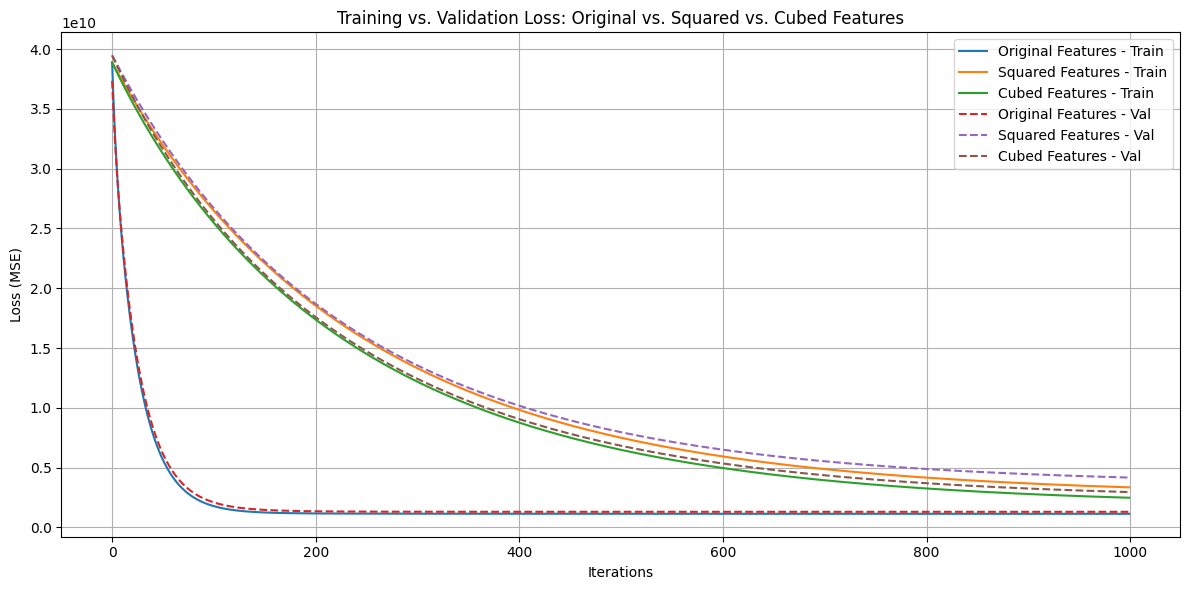

In [20]:
plt.figure(figsize=(12, 6))

# Training Loss
plt.plot(model_original.loss, label='Original Features - Train')
plt.plot(model_squared.loss, label='Squared Features - Train')
plt.plot(model_cubed.loss, label='Cubed Features - Train')

# Validation Loss
plt.plot(model_original.val_loss, '--', label='Original Features - Val')
plt.plot(model_squared.val_loss, '--', label='Squared Features - Val')
plt.plot(model_cubed.val_loss, '--', label='Cubed Features - Val')

plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Training vs. Validation Loss: Original vs. Squared vs. Cubed Features')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Original Features:


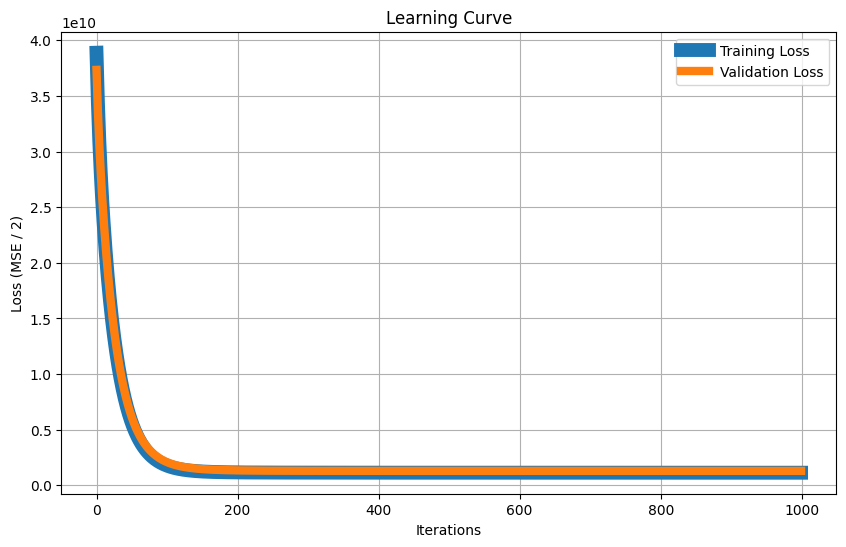

Squared Features:


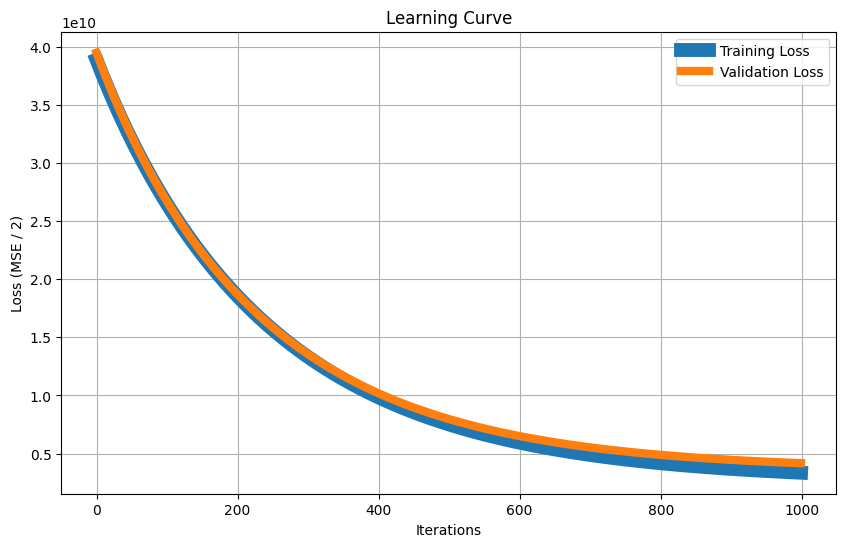

Cubed Features:


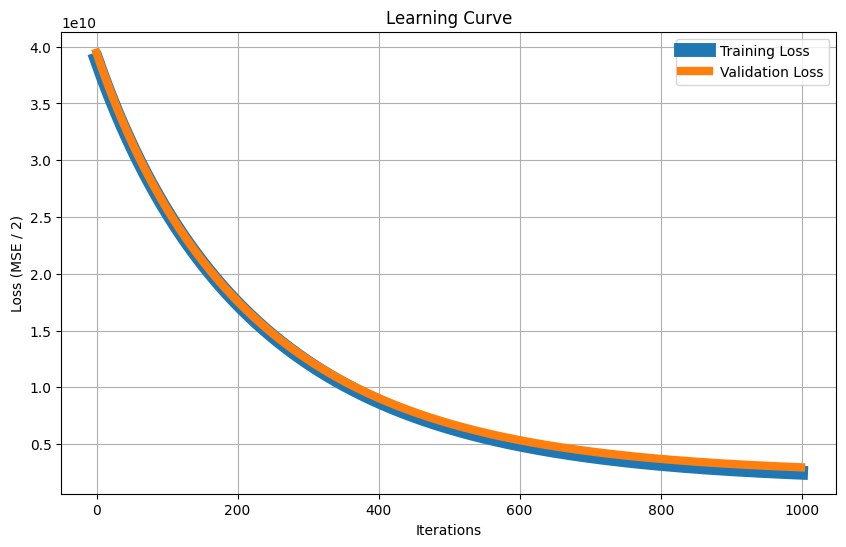

In [21]:
# Plot the curves
# Plot learning curves for all models
print("Original Features:")
plot_learning_curve(model_original)

print("Squared Features:")
plot_learning_curve(model_squared)

print("Cubed Features:")
plot_learning_curve(model_cubed)

In [22]:
# Comparison
# Predictions and MSE for each model
y_pred_original = model_original.predict(X_test_scaled)
y_pred_squared = model_squared.predict(X_test_squared)
y_pred_cubed = model_cubed.predict(X_test_cubed)

mse_original = mean_squared_error(y_test, y_pred_original)
mse_squared = mean_squared_error(y_test, y_pred_squared)
mse_cubed = mean_squared_error(y_test, y_pred_cubed)

print(f"Original Features MSE: {mse_original:.2f}")
print(f"Squared Features MSE: {mse_squared:.2f}")
print(f"Cubed Features MSE: {mse_cubed:.2f}")

Original Features MSE: 1303924344.33
Squared Features MSE: 4168558544.90
Cubed Features MSE: 2954281595.90


The Original Features MSE is 1.3 billion, which is our baseline. The Squared Features MSE is over 3x higher than the original since squaring the features likely amplified noise or outliers. Cubed Features is worse than the original, but better than squared. Since results are significantly worse than the original features, it indicates the target variable doesn’t have higher-order dependencies on the features, or the model might be overfitting.

# Problem 10: (Advanced assignment) Deriving the update formula
The update formula for the gradient descent method is as follows by explaining how this formula was derived.

\[\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]\]
We can begin with the following formula:

\[\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\\]
The objective function (loss function) $J(\theta)$ is given by:

\[J(\theta)= \frac{1 }{ 2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.\]

# 1. The Loss Function
We start with the mean squared error (MSE), which is commonly used as the loss function for linear regression:
$$J(θ)=\frac{1}{2m}\sum_{i=1}^{m}(hθ​(x^i)−y^i)^2$$

Where:
$$J(θ)$$ - cost function

$$\frac{1}{2m}$$ - normalization term

$$\sum_{i=1}^{m}$$ - summing over all m training examples

$$(hθ​(x^i)−y^i)^2$$ - squared error between prediction and actual value


# 2. Objective
To minimize the loss function J(θ), we apply gradient descent. The basic idea of gradient descent is to update the parameters 𝜃_j in the direction of the negative gradient of the loss function with respect to 𝜃_j.

The gradient descent update rule for 𝜃_𝑗 is:
$$𝜃_j = 𝜃_j - \alpha\frac{∂j(𝜃)}{∂𝜃_j}$$
 
Where:

α is the learning rate, which controls how big each step is in the direction of the gradient.

# 3. Gradient Loss Function
Now, we need to compute the partial derivative of J(θ) with respect to 𝜃_𝑗, the j-th parameter.

The loss function is:
$$J(θ)=\frac{1}{2m}\sum_{i=1}^{m}(hθ​(x^i)−y^i)^2$$
 
Let’s take the derivative with respect to 𝜃_𝑗.
# 4. Deriving Calculation
To compute the gradient, we’ll apply the chain rule to the loss function.

Step 1: Apply the chain rule:
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{\partial}{\partial \theta_j} \left( \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 \right)$$

Step 2: Differentiate the squared term:

Since 1/2m is a constant factor, we can pull it out of the derivative. The derivative of $$(hθ​(x^i)−y^i)^2$$ with respect to 𝜃_𝑗 is: 
$$\frac{\partial}{\partial \theta_j} \left( \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 \right) = 2 \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} h_\theta(x^{(i)})$$

Now, recall that the hypothesis $$hθ​(x^i)$$ is a linear function of the form:
$$h_\theta(x^{(i)}) = \theta_0 + \theta_1 x_1^{(i)} + \cdots + \theta_j x_j^{(i)} + \cdots + \theta_n x_n^{(i)}$$

So, the derivative of $$hθ​(x^i)$$ with respect to 𝜃_j is simply:
$$\frac{\partial}{\partial \theta_j} h_\theta(x^{(i)}) = x_j^{(i)}$$
 
Thus, the derivative of the squared term is:
$$2 \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$
 
Step 3: Combine the results:

Now, we can put everything together. The derivative of the loss function with respect to 𝜃_j  becomes: $$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

# 5. Gradient Descent Update
Now, we can substitute the gradient into the gradient descent update rule:
$$\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$
 
This is the gradient descent update formula for \theta_j.
# 6. Intepretation
The update for 𝜃_j involves adjusting 𝜃_j by subtracting the gradient, scaled by the learning rate α.

The gradient is the average of the product of the error term $$hθ​(x^i)−y^i)$$ and the corresponding feature $$(x^i)_j$$  across all samples.

This formula tells us how to adjust each parameter 𝜃_j to reduce the error between the predicted and actual target values.


# Problem 11: (Advanced problem) Local optimum solution problem
The gradient descent method generally has a problem with local optima. However, with linear regression, you can always find the optimal solution by continuing to learn. This is the case because it has a single global minimum.

# 1. Linear Regression Cost Function
The cost function for linear regression is:

$$J(θ)=\frac{1}{2m}\sum_{i=1}^{m}(hθ​(x^i)−y^i)^2=\frac{1}{2m}∥Xθ−y∥^2$$
 
This is a quadratic function in terms of θ.
# 2. Cost Function Convexity
A function is convex if its second derivative is positive semi-definite.

For linear regression:

The Hessian matrix (second derivative) of the cost function is:
$$ H= \frac{∂^2J(θ)}{∂θ^2} = \frac{X^TX}{m}$$

X^TX is always positive semi-definite (for any matrix X) meaning that the cost function forms a bowl-shaped surface and it has one global minimum and no local minima.

Gradient descent will always converge to the global optimum (if learning rate is not too large)
# 3. Visual Representation


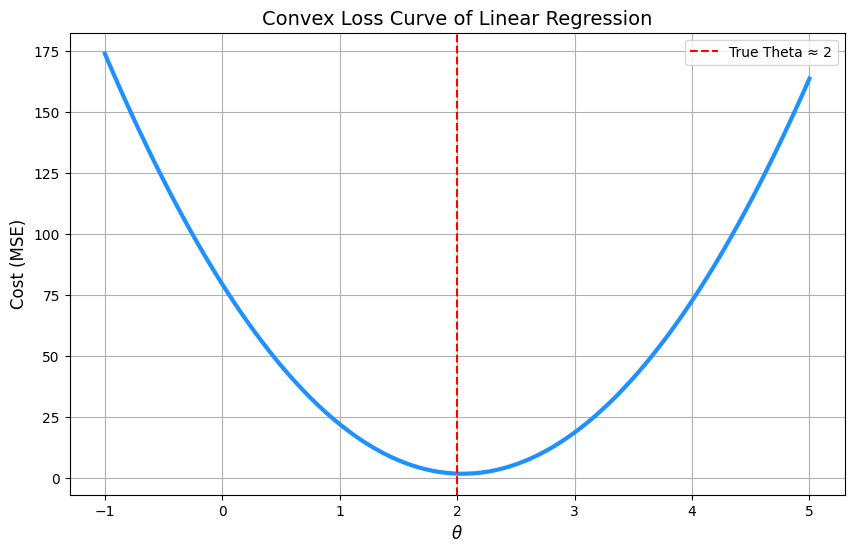

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function for a simple linear regression model with one feature and no bias term
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X * theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Generate synthetic data
X = np.linspace(1, 10, 100).reshape(-1, 1)
y = 2 * X + np.random.randn(*X.shape) * 2  # y = 2x + noise

# Create a range of theta values to visualize the loss
theta_vals = np.linspace(-1, 5, 100)
cost_vals = np.array([compute_cost(theta, X, y) for theta in theta_vals])

# Plot the convex loss curve
plt.figure(figsize=(10, 6))
plt.plot(theta_vals, cost_vals, linewidth=3, color="dodgerblue")
plt.title("Convex Loss Curve of Linear Regression", fontsize=14)
plt.xlabel(r"$\theta$", fontsize=12)
plt.ylabel("Cost (MSE)", fontsize=12)
plt.grid(True)
plt.axvline(x=2, color='red', linestyle='--', label="True Theta ≈ 2")
plt.legend()
plt.show()


Here’s a plot of the convex loss surface for linear regression. It forms a smooth U-shape (a parabola), and gradient descent will always find the global minimum at the bottom of the curve. This demonstrates why linear regression doesn't suffer from local minima.